In [2]:
#import scanpy as sc
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist,cdist, squareform
from scipy.spatial import procrustes
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from functions import *

/Users/noahbergam/Desktop/tsne-mode-collapse/umap_env2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


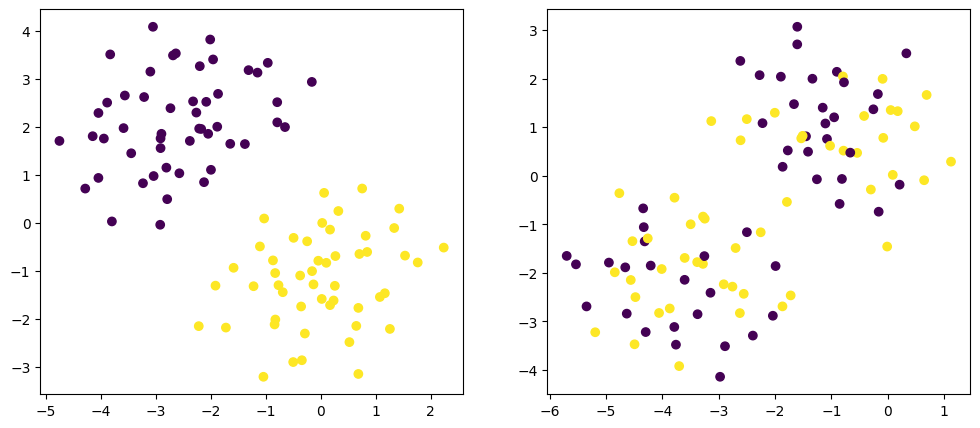

In [3]:

X = two_gaussians(50, distance=0.8, dim=500)
Z = two_gaussians(50, distance=0.8, dim=500)
X = X[ np.random.permutation(X.shape[0]), :]
Z = Z[ np.random.permutation(Z.shape[0]), :]

X, Z, disparity = procrustes(X, Z)



cost_matrix = cdist(X, Z, metric='euclidean')  # shape (n, n)
# Solve the assignment problem
row_ind, col_ind = linear_sum_assignment(cost_matrix)
# col_ind gives the indices of Y matched to X
Z = Z[col_ind]
# now we can think of Z as the perturbed version of X


tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_tsne)


pca = TSNE(n_components = 2)
X_proj = pca.fit_transform( X )

pca = TSNE(n_components = 2)
Z_proj = pca.fit_transform( Z )


fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].scatter(X_proj[:,0], X_proj[:,1], c=kmeans.labels_)
axs[1].scatter(Z_proj[:,0], Z_proj[:,1], c=kmeans.labels_)




In [4]:


import umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(X_umap)


fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0,0].scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
axs[0,0].set_aspect('equal')
axs[0,0].set_xlabel('tSNE 1')
axs[0,0].set_ylabel('tSNE 2')
axs[0,0].set_title('t-SNE: 50 pts x 2 Gaussians in 5000-dimensions')
#axs[0,1].hist(pdist(X, metric='euclidean'), bins=50)
#axs[0,1].set_xlim(0, max(pdist(X, metric='euclidean')))

tsne = TSNE(n_components=2, perplexity=50, random_state=0)
Z_tsne = tsne.fit_transform(Z)
axs[0,1].scatter(Z_tsne[:,0], Z_tsne[:,1],c=kmeans.labels_)
axs[0,1].set_title('< 2% perturbation of the left-hand dataset')
axs[0,1].set_aspect('equal')
axs[0,1].set_xlabel('tSNE 1')
axs[0,1].set_ylabel('tSNE 2')



axs[1,0].scatter(X_umap[:,0], X_umap[:,1], c=kmeans2.labels_)
axs[1,0].set_aspect('equal')
axs[1,0].set_xlabel('UMAP 1')
axs[1,0].set_ylabel('UMAP 2')
axs[1,0].set_title('UMAP: 50 pts x 2 Gaussians in 5000-dimensions')
#axs[0,1].hist(pdist(X, metric='euclidean'), bins=50)
#axs[0,1].set_xlim(0, max(pdist(X, metric='euclidean')))

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
Z_umap = reducer.fit_transform(Z)
axs[1,1].scatter(Z_umap[:,0], Z_umap[:,1],c=kmeans2.labels_)
axs[1,1].set_title('< 2% perturbation of the left-hand dataset')
axs[1,1].set_aspect('equal')
axs[1,1].set_xlabel('UMAP 1')
axs[1,1].set_ylabel('UMAP 2')

print(disparity)
plt.savefig('Gaussian slightly perturbed')

/Users/noahbergam/Desktop/tsne-mode-collapse/umap_env2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: check_array() got an unexpected keyword argument 'ensure_all_finite'

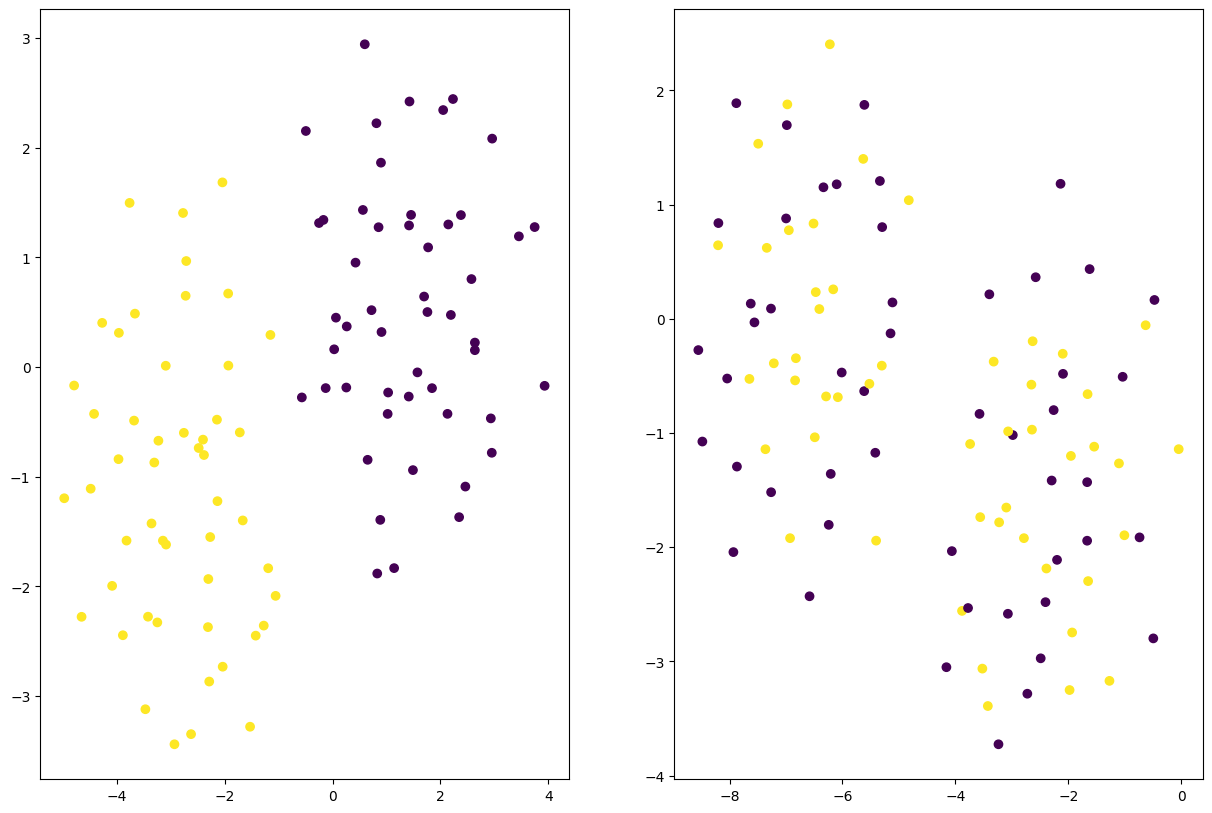

AttributeError: module 'tensorflow' has no attribute '__version__'

In [4]:
n=100

dimensions = [1000, 1000]

Ds = dimensions.copy()
Xs = dimensions.copy()
for i in range(len(dimensions)):
    X = two_gaussians(NumPointsInCluster=n ,distance=1, dim=dimensions[i])
    Xs[i] = X
    Ds[i] = cdist(X, X, 'sqeuclidean') #distanceSquaredArray2(np.matmul(X, np.transpose(X)))

#Setting one point to the mean
i=0
Xs[i][n] =  np.mean(Xs[i])
Ds[i] = cdist(Xs, Xs, 'sqeuclidean') #distanceSquaredArray2(np.matmul(Xs[i], np.transpose(Xs[i])))

#Creating Figure
fig, ax = plt.subplots(nrows=2, ncols=len(Ds))
fig.set_figwidth(5*len(dimensions))
fig.set_figheight(10)

#Running T-SNE
F = TSNE(learning_rate=100, perplexity=100)

#Running Single Linkage on X
LinkageMethod = "ward"


for i in range(len(Ds)):
    #Plot t-SNE
    Y_features = F.fit_transform(Xs[i])
    Y_xaxis = Y_features[:,0]
    Y_yaxis = Y_features[:,1]
    
    ax[0, i].scatter(Y_xaxis, Y_yaxis, marker="o", cmap="bwr_r", alpha=0.5)
    ax[0, i].set(xlabel='X', ylabel='Y', title='t-SNE Visualization (dim = '+ str(dimensions[i])+')')
    ax[0, i].axis('equal')
    
    #Plot Interpoint Distance Matrix
    Dmin = np.min(Ds[i]+np.max(Ds[i])*np.identity(Ds[i].shape[0]))
    Dmax = np.max(Ds[i])
    aspectRatio = Dmax/Dmin
    
    ASS = silhouette_score(Xs[i], np.concatenate((np.ones(n),np.zeros(n)))) #returns average silhouette score
    
    ax[1, i].imshow(Ds[i])
    ax[1, i].set(title='Distance Matrix (dim = '+ str(dimensions[i])+')', xlabel='Silhouette Score = ' + str(np.round(ASS,decimals=3))+', Aspect Ratio = '+ str(np.round(aspectRatio,decimals=2)))

ValueError: XA must be a 2-dimensional array.